In [2]:
# Name : Shiva Ganesh Reddy Lakkasani
# Roll Number : 20EE10069
# MLFA (AI42001) Assignment - 1

import numpy as np
input_dataset_1 = np.load('Dataset-1\inputs_Dataset-1.npy')
print(input_dataset_1)
output_dataset_1 = np.load('Dataset-1\outputs_Dataset-1.npy')
print(output_dataset_1)


[[  1.         -95.84961013  26.72964699 ... -66.17783269 -82.33203717
   37.07196367]
 [  1.         -99.21034673   2.43845268 ...  42.91515668   8.5088736
  -71.56599048]
 [  1.          34.82672301 -11.63336512 ...  61.04463937   4.32943048
   81.72977616]
 ...
 [  1.           6.94603011 -15.71979117 ... -73.48312897  41.11707902
  -44.01106662]
 [  1.          78.10725482 -48.03236583 ... -40.91290604 -19.99833718
   82.34301134]
 [  1.          88.46751939  83.57312716 ... -75.42442815 -91.89956548
  -80.53013234]]
[0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1

In [3]:


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(input_dataset_1)
df['class'] = pd.DataFrame(output_dataset_1)
df


,0,1,2,3,4,5,6,7,8,9,10,class
0,1.0,-95.849610,26.729647,49.760777,-0.298598,-55.040671,-60.387427,52.106142,-66.177833,-82.332037,37.071964,0.0
1,1.0,-99.210347,2.438453,62.524192,22.505213,44.351063,-41.624786,83.554825,42.915157,8.508874,-71.565990,0.0
2,1.0,34.826723,-11.633365,-13.197201,23.553396,2.627649,30.079436,20.207791,61.044639,4.329430,81.729776,1.0
3,1.0,-81.908130,-39.859989,-77.203128,65.736265,-90.620736,25.257430,9.517231,63.857399,-60.210492,71.370060,0.0
4,1.0,50.929538,-40.807659,76.787296,-34.897672,-66.996820,-21.494151,-81.307925,64.221132,-69.769596,-23.177110,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,-29.923659,-79.965539,45.549107,38.566525,-66.640502,63.301595,-73.549077,46.137724,50.899983,5.393469,1.0
996,1.0,84.110473,25.448967,21.851394,-82.360143,-99.267645,38.585062,-23.504228,55.038894,8.170015,32.653152,1.0
997,1.0,6.946030,-15.719791,-81.511579,-75.938673,-1.809381,-20.383326,26.689865,-73.483129,41.117079,-44.011067,1.0
998,1.0,78.107255,-48.032366,92.743597,-80.443848,-42.604186,-31.199926,29.943364,-40.912906,-19.998337,82.343011,1.0


In [14]:
# Determination of the type of data set, by implementing the PLA for DataSet - 1 :

X = input_dataset_1    # Given input dataset 1
y = output_dataset_1   # Given Output dataset 1

#defining a global unit step function
def unit_step_func(x):
    return np.where(x >= 0, 1, 0)


class perceptron:
    def __init__(self, learning_rate = 1, max_iters = 2000) :
        self.lr = learning_rate
        self.max_iters = max_iters
        self.activation_func = unit_step_func
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape

        #initialize the parameters
        self.weights = np.random.uniform(-5.0, 5.0, n_features+1)
        self.bias = 0

        y_ = np.where(y >= 0, 1, 0)

        #learning the weights
        for _ in range(self.max_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron weights update rule
                update = self.lr * (y_[idx] - y_predicted)
                self.weights = self.weights + update * x_i
                #self.bias += update {#doubt}




    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted
    







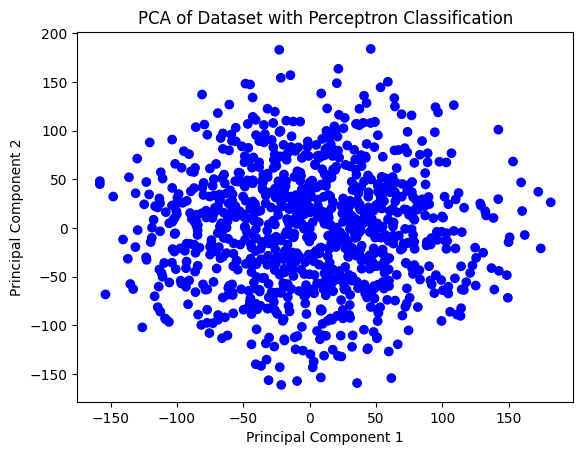

In [17]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming training_inputs is your input dataset and labels is your output dataset

# Apply PCA and transform data to 2D
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(input_dataset_1)

# Plot the transformed data
fig, ax = plt.subplots()
colors = ['red' if label == -1 else 'blue' for label in output_dataset_1]
ax.scatter(transformed_data[:, 0], transformed_data[:, 1], c=colors)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA of Dataset with Perceptron Classification')

plt.show()


In [15]:
basic_dataset_input_1 = np.random.uniform(-100.0, 100.0, (1000, 11))
basic_dataset_input_1[:, 0] = np.ones(1000)
basic_dataset_ground_truth_weights_1 = np.random.uniform(-5.0, 5.0, 11)
basic_dataset_output_1 = np.matmul(basic_dataset_input_1, basic_dataset_ground_truth_weights_1)
basic_dataset_output_1[basic_dataset_output_1 >= 0.0] = 1
basic_dataset_output_1[basic_dataset_output_1 < 0.0] = 0
print(basic_dataset_input_1.shape)
print(basic_dataset_ground_truth_weights_1.shape)
print(basic_dataset_output_1.shape)
print(basic_dataset_input_1)
print(basic_dataset_ground_truth_weights_1)
print(basic_dataset_output_1)

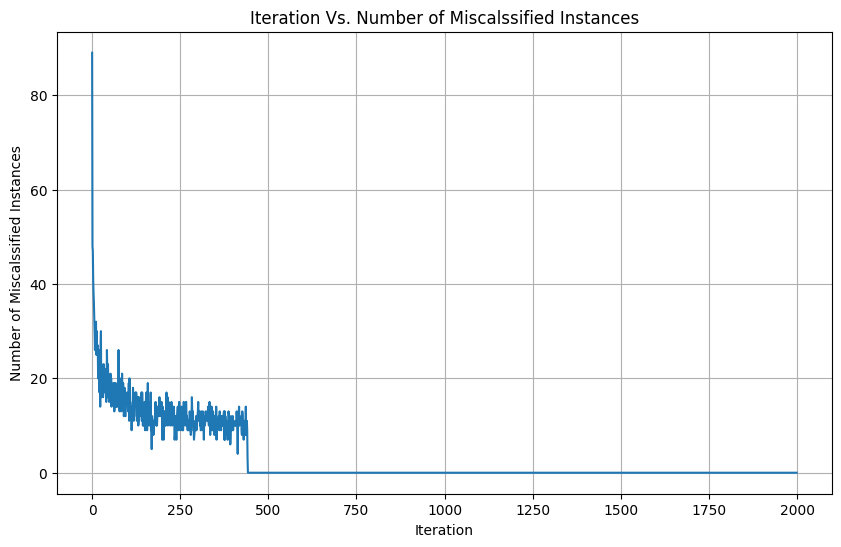

[0.828, 0.788, 0.8565217391304348, 0.8208333333333334]
[0.828, 0.8535564853556485, 0.8, 0.8259109311740891]

Mean of the metrics:  [0.828      0.82077824 0.82826087 0.82337213]

Variance of the metrics:  [0.00000000e+00 1.07441319e-03 7.98676749e-04 6.44549996e-06]
[0.8473053892215568, 0.8395061728395061, 0.84472049689441, 0.8421052631578948]
[0.8708708708708709, 0.8280254777070064, 0.8904109589041096, 0.858085808580858]
[0.8588588588588588, 0.8875739644970414, 0.8426966292134831, 0.8645533141210374]

Mean of the metrics:  [0.85901171 0.85170187 0.85927603 0.8549148 ]

Variance of the metrics:  [9.25670021e-05 6.65371248e-04 4.85374624e-04 8.90134947e-05]
[0.856, 0.8823529411764706, 0.8267716535433071, 0.853658536585366]
[0.828, 0.7727272727272727, 0.8252427184466019, 0.7981220657276995]
[0.88, 0.8925619834710744, 0.864, 0.8780487804878049]
[0.88, 0.8787878787878788, 0.8923076923076924, 0.8854961832061069]

Mean of the metrics:  [0.861      0.85660752 0.85208052 0.85383139]

Variance o

In [10]:
# Name : Shiva Ganesh Reddy Lakkasani
# Roll Number : 20EE10069
# MLFA (AI42001) Assignment - 1

# importing dataset - 1
import numpy as np
import matplotlib.pyplot as plt
input_dataset_1 = np.load('Dataset-1\inputs_Dataset-1.npy')

output_dataset_1 = np.load('Dataset-1\outputs_Dataset-1.npy')



# correcting output dataset - 1 (i.e. changing all zeroes to 1's)
output_dataset_1[output_dataset_1 == 0] = -1         # Applying Boolean Mask


# Implementation of PLA for DataSet - 1 :

X_1 = input_dataset_1    # Given input dataset 1
y_1 = output_dataset_1   # Given output dataset 1

# defining a class called "Perceptron"
class Perceptron:
    def __init__(self, MAX_iters) :
        self.MAX_iters = MAX_iters
        
    def predict(self, inputs):
        return 1 if np.dot(inputs, self.weights) >= 0 else -1
    
    def plot_misclassification_history(self):
        plt.figure(figsize=(10,6))
        plt.plot(self.misclassified_history)
        plt.xlabel('Iteration')
        plt.ylabel('Number of Misclassified Instances')
        plt.title('Iteration Vs. Number of Misclassified Instances')
        plt.grid(True)
        plt.show()
    
    def fit(self, X_1, y_1):
        n_samples, n_features = X_1.shape
        # List to keep track of misclassified counts at each iteration
        self.misclassified_history = []
        #initialize the parameters
        self.weights = np.random.uniform(-5.0, 5.0, n_features)  # Here, n_features includes the extra dimension for '1', hence, we are not doing, 'n_features+1'

        
        for _ in range(self.MAX_iters):
            num_of_misclassified = 0
            for inputs, label in zip(X_1, y_1):
                prediction = self.predict(inputs)
                if prediction != label:
                    self.weights += label * inputs
                    num_of_misclassified += 1
            # Store the number of misclassified for this iteration
            self.misclassified_history.append(num_of_misclassified)


perceptron_1a = Perceptron(2000)                    # passing the parameter 'MAX_iters' to the object 'perceptron'
perceptron_1a.fit(X_1, y_1)                         # calling the fit method in 'perceptron' class
perceptron_1a.plot_misclassification_history()      # plot the iteration Vs. number of misclassification counts

# EXPERIMENT - 1 :

# PART - A :

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for i in range(10):
    k = i + 2
    kf = KFold(n_splits=k)

    knn_kfold = []
    prediction_kfold = []
    metrics_kfold = []

    for train_index, test_index in kf.split(X_1):      # this loop will run for 'k' times
        X_train, X_test = X_1[train_index], X[test_index]
        y_train, y_test = y_1[train_index], y[test_index]

        knn_kfold.append(KNeighborsClassifier(n_neighbors=5))
        knn_kfold[-1].fit(X_train, y_train)
        prediction = knn_kfold[-1].predict(X_test)

        acc = accuracy_score(y_test, prediction)     # TP+TN / (TP + FP + TN + FN)
        prec = precision_score(y_test, prediction)   # TP / (TP+FP)
        rec = recall_score(y_test, prediction)       # TP / (TP+FN)
        f1 = f1_score(y_test, prediction)            # f1_score = (2 * prec * rec)/(prec + rec)

        prediction_kfold.append(prediction)
        metrics_kfold.append([acc, prec, rec, f1])
        

    for metrics in metrics_kfold:
        print(metrics)

    #find mean and variance for performance metrics of the models
    metrics_array = np.array(metrics_kfold)
    mean_metrics = np.mean(metrics_array, axis=0)
    var_metrics = np.var(metrics_array, axis=0)

    print("\nMean of the metrics: ", mean_metrics)
    print("\nVariance of the metrics: ", var_metrics)




    







In [3]:
# PART - C : [80:20 split and counting the number of misclassified instances]

from sklearn.model_selection import train_test_split
X_train_c, X_test_c = train_test_split(X_1, test_size=0.2, shuffle=False)
y_train_c, y_test_c = train_test_split(y_1, test_size=0.2, shuffle=False)

perceptron_1c = Perceptron(2000)                    # passing the parameter 'MAX_iters' to the object 'perceptron'
perceptron_1c.fit(X_train_c, y_train_c)                       # calling the fit method in 'perceptron' class
perceptron_1c.plot_misclassification_history()      # plot the iteration Vs. number of misclassification counts

[[  1.          13.29464716  34.21921017 ... -86.20344948 -54.94236374
   33.44457395]
 [  1.          25.80116084 -46.44714764 ...  38.93375639 -22.56557202
   93.63178448]
 [  1.         -20.24102948  33.55457505 ...  48.61337831  92.85727281
  -26.30482094]
 ...
 [  1.           6.94603011 -15.71979117 ... -73.48312897  41.11707902
  -44.01106662]
 [  1.          78.10725482 -48.03236583 ... -40.91290604 -19.99833718
   82.34301134]
 [  1.          88.46751939  83.57312716 ... -75.42442815 -91.89956548
  -80.53013234]]
